In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Define sigmoid and derivative of sigmoid

In [30]:
def sigmoid(x, deriv=False):
    """Compute sigmoid function and its derivative."""
    if not deriv:
        return 1/(1+np.exp(-x))
    else:
        return 1/(1+np.exp(-x))*(1-1/(1+np.exp(-x)))
def show_sigmoid(x, deriv=False):
    """Plot sigmoid function and its derivative."""
    if not deriv:
        plt.plot(x, 1/(1+np.exp(-x)), label='sig')
    else:
        plt.plot(x, 1/(1+np.exp(-x))*(1-1/(1+np.exp(-x))), label='deriv of sig')

In [17]:
x = np.linspace(-10,10,50)

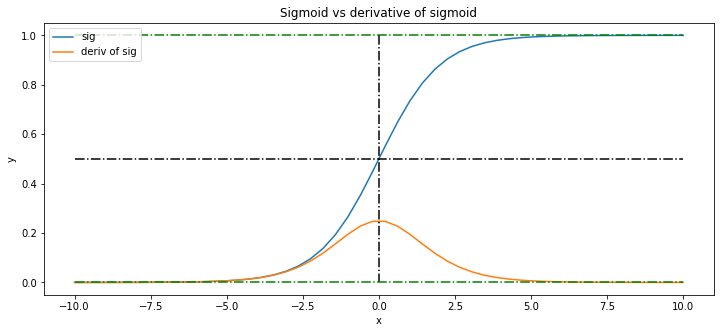

In [29]:
plt.figure(figsize=(12,5))
plt.title('Sigmoid vs derivative of sigmoid')
plt.xlabel('x')
plt.ylabel('y')
show_sigmoid(x)
show_sigmoid(x, True)
plt.plot([0, 0], [1, 0], 'k-.')
plt.plot([-10, 10], [0, 0], 'g-.')
plt.plot([-10, 10], [1, 1], 'g-.')
plt.plot([-10, 10], [0.5, 0.5], 'k-.')
plt.legend()

In [382]:
class neural_net():
    """Creates and initialize neural network."""
    def __init__(self, input_shape = (2, 4), n_layers = 2, n_neurons_each_layer = (3,2), debug=False):
        if n_layers != len(n_neurons_each_layer):
            print("""Error!
Length of n_neurons_each_layer variable should be the same as n_layers variable number.
Example:
Define Neural Network with 2 hidden layers and output layer: n_layers = 3
Define the number of neurons in each layer:
Hidden layer 1: 4
Hidden layer 2: 3
Output layer: 2
n_neurons_each_layer = (4,3,2)""")
        self.debug = debug
        self.n_features = input_shape[0] # takes number os features (number of input columns)
        self.n_examples = input_shape[1] # takes number of examples (number of input rows)
        self.n_layers = n_layers
        self.n_neurons_each_layer = n_neurons_each_layer
        self.weights_per_layer = list()
        self.initiate_weights()
        self.z_per_layer = list()
        self.a_per_layer = list()
        self.initiate_z()
        self.initiate_a()
        self.error = list()
        self.deriv = list()
        
        self.debug_nn()
        
    def debug_nn(self):
        """Only for debug purposes, shows weights..."""
        if self.debug:
            print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
            print("These are weights randomly initiated per layer:")
            print()
            for i, val in enumerate(self.weights_per_layer):
                print("Weights between layers: {} - {}".format(i, i+1))
                print(val)
                print()
            print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
            print("Z values per layer:")
            print()
            for i, val in enumerate(self.z_per_layer):
                print("Z values at layer: {}".format(i+1))
                print(val)
                print()
            print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
            print("A values per layer:")
            print()
            for i, val in enumerate(self.a_per_layer):
                print("A values at layer: {}".format(i+1))
                print(val)
                print()
            print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        
    def initiate_weights(self):
        """Randomly initiate neural networks weights."""
        for i in range(self.n_layers):
            if i == 0:
                self.weights_per_layer.append(np.random.rand(self.n_features, self.n_neurons_each_layer[i]))
            else:
                self.weights_per_layer.append(np.random.rand(self.n_neurons_each_layer[i-1], self.n_neurons_each_layer[i]))
                
    def initiate_z(self):
        """Initiate neural networks Z function matrices. (it is not necessary)"""
        for i in range(self.n_layers):
            self.z_per_layer.append(np.zeros((self.n_examples, self.weights_per_layer[i].shape[1])))
            
    def initiate_a(self):
        """Initiate neural networks activation matrices. (it is not necessary)"""
        for i in range(self.n_layers):
            self.a_per_layer.append(np.zeros((self.n_examples, self.weights_per_layer[i].shape[1])))

    def sigmoid(self, X, deriv=False):
        """Compute sigmoid function and its derivative."""
        if not deriv:
            return 1/(1+np.exp(-X))
        else:
            return 1/(1+np.exp(-X))*(1-1/(1+np.exp(-X)))
            
    def mse(self, Y, deriv=False):
        """Compute Mean Squere Error and its derivative"""
        if not deriv:
            return np.sum(np.sum((Y-self.a_per_layer[-1])**2, axis=1))/(2*self.n_examples)
        else:
            return -(Y-self.a_per_layer[-1])/self.n_examples
            
    def train(self, X, Y, n_epochs = 10, lr = 0.1):
        """Training method.
        1. Forward propagation.
        2. Compute MSE.
        3. Compute gradients per weight matrices.
        4. Update weight matrices with respect to gradient and learning rate.
        5. Forward propagate and see MSE result after weights adjustment."""
        for epoch in range(n_epochs):
            for i in range(self.n_layers): # forward propagation
                if i == 0:
                    self.z_per_layer[i] = np.dot(X, self.weights_per_layer[i]) # compute first layer z functions matrix
                    self.a_per_layer[i] = self.sigmoid(self.z_per_layer[i]) # compute first layer a functions matrix
                else:
                    # compute the rest of the z and a functions matrices in next layers
                    self.z_per_layer[i] = np.dot(self.a_per_layer[i-1], self.weights_per_layer[i])
                    self.a_per_layer[i] = self.sigmoid(self.z_per_layer[i])
            print("Loss: {}".format(self.mse(Y)))
            # compute gradient and start bacpropagation
            # start from the last layer, compute deltas (errors) for each layer
            for i in range(self.n_layers):
                if i == 0:
                    # elementwise multiplication (hadamard product)
                    self.error.append(np.multiply(self.mse(Y, deriv=True), self.sigmoid(self.z_per_layer[-(i+1)], deriv=True)))
                else:
                    self.error.append(np.dot(self.error[-1], self.weights_per_layer[-i].T) * self.sigmoid(self.z_per_layer[-(i+1)], deriv=True))
            # compute gradient for each layer of weights
            for i in range(len(self.error)):
                if i == len(self.error)-1:
                    self.deriv.append(np.dot(X.T, self.error[i]))
                else:
                    self.deriv.append(np.dot(self.a_per_layer[-(i+2)].T, self.error[i]))
            # update weights by substracting deltas depend on leanring rate
            for i, dt in enumerate(list(reversed(self.deriv))):
                self.weights_per_layer[i] = self.weights_per_layer[i] - lr*dt
            # make forward propagation one more time to compute new MSE (loss)
            for i in range(self.n_layers):
                if i == 0:
                    self.z_per_layer[i] = np.dot(X, self.weights_per_layer[i])
                    self.a_per_layer[i] = self.sigmoid(self.z_per_layer[i])
                else:
                    self.z_per_layer[i] = np.dot(self.a_per_layer[i-1], self.weights_per_layer[i])
                    self.a_per_layer[i] = self.sigmoid(self.z_per_layer[i])
            print("Loss: {}".format(self.mse(Y)))
            self.error = list()
            self.deriv = list()
    def predict(self, X):
        """Prediction method, just forward propagate test dataset and compute output."""
        for i in range(self.n_layers):
                if i == 0:
                    self.z_per_layer[i] = np.dot(X, self.weights_per_layer[i])
                    self.a_per_layer[i] = self.sigmoid(self.z_per_layer[i])
                else:
                    self.z_per_layer[i] = np.dot(self.a_per_layer[i-1], self.weights_per_layer[i])
                    self.a_per_layer[i] = self.sigmoid(self.z_per_layer[i])
        return self.a_per_layer[-1]

In [386]:
z = neural_net(input_shape = (2, 7), n_layers = 2, n_neurons_each_layer = (10,2), debug=False)

In [387]:
z.train(X = np.array([[0,0],[1,1],[1,0],[0,0],[0,0],[0,0]]), Y = np.array([[0,1],[1,0],[1,0],[0,1],[0,1],[0,1]]), n_epochs = 1000, lr = 10)

Loss: 0.37410142683976005
Loss: 0.3227035950568167
Loss: 0.3227035950568167
Loss: 0.22156320340810812
Loss: 0.22156320340810812
Loss: 0.20067502472562873
Loss: 0.20067502472562873
Loss: 0.18787363127753384
Loss: 0.18787363127753384
Loss: 0.18075086257407585
Loss: 0.18075086257407585
Loss: 0.17224658578654692
Loss: 0.17224658578654692
Loss: 0.16206937305557384
Loss: 0.16206937305557384
Loss: 0.15014817218651885
Loss: 0.15014817218651885
Loss: 0.13670661867306355
Loss: 0.13670661867306355
Loss: 0.12230389134319909
Loss: 0.12230389134319909
Loss: 0.1077257297956543
Loss: 0.1077257297956543
Loss: 0.09377838438616272
Loss: 0.09377838438616272
Loss: 0.08107258968004295
Loss: 0.08107258968004295
Loss: 0.06993175255729696
Loss: 0.06993175255729696
Loss: 0.06041807705310737
Loss: 0.06041807705310737
Loss: 0.05242388125430989
Loss: 0.05242388125430989
Loss: 0.045759964049731296
Loss: 0.045759964049731296
Loss: 0.04021695881902098
Loss: 0.04021695881902098
Loss: 0.0355981605341331
Loss: 0.0355981

Loss: 0.0003473234473041161
Loss: 0.0003473234473041161
Loss: 0.00034646345388790516
Loss: 0.00034646345388790516
Loss: 0.0003456076123341142
Loss: 0.0003456076123341142
Loss: 0.0003447558929618357
Loss: 0.0003447558929618357
Loss: 0.0003439082663705915
Loss: 0.0003439082663705915
Loss: 0.00034306470343703965
Loss: 0.00034306470343703965
Loss: 0.0003422251753117256
Loss: 0.0003422251753117256
Loss: 0.00034138965341589777
Loss: 0.00034138965341589777
Loss: 0.00034055810943834036
Loss: 0.00034055810943834036
Loss: 0.000339730515332281
Loss: 0.000339730515332281
Loss: 0.0003389068433123037
Loss: 0.0003389068433123037
Loss: 0.00033808706585133967
Loss: 0.00033808706585133967
Loss: 0.00033727115567768064
Loss: 0.00033727115567768064
Loss: 0.00033645908577203536
Loss: 0.00033645908577203536
Loss: 0.0003356508293646316
Loss: 0.0003356508293646316
Loss: 0.00033484635993235787
Loss: 0.00033484635993235787
Loss: 0.00033404565119593506
Loss: 0.00033404565119593506
Loss: 0.00033324867711713717
Los

Loss: 0.00015670119613817138
Loss: 0.00015652019915788972
Loss: 0.00015652019915788972
Loss: 0.00015633961234153953
Loss: 0.00015633961234153953
Loss: 0.00015615943430712125
Loss: 0.00015615943430712125
Loss: 0.0001559796636787987
Loss: 0.0001559796636787987
Loss: 0.0001558002990868857
Loss: 0.0001558002990868857
Loss: 0.00015562133916779795
Loss: 0.00015562133916779795
Loss: 0.00015544278256401624
Loss: 0.00015544278256401624
Loss: 0.00015526462792406757
Loss: 0.00015526462792406757
Loss: 0.00015508687390247726
Loss: 0.00015508687390247726
Loss: 0.00015490951915974452
Loss: 0.00015490951915974452
Loss: 0.00015473256236230476
Loss: 0.00015473256236230476
Loss: 0.00015455600218249822
Loss: 0.00015455600218249822
Loss: 0.0001543798372985381
Loss: 0.0001543798372985381
Loss: 0.00015420406639448018
Loss: 0.00015420406639448018
Loss: 0.00015402868816018477
Loss: 0.00015402868816018477
Loss: 0.0001538537012912903
Loss: 0.0001538537012912903
Loss: 0.000153679104489178
Loss: 0.0001536791044891

In [392]:
z.predict(X = np.array([[0,1], [0,0], [1,1], [1,0]]))

array([[0.26614003, 0.73805845],
       [0.01201397, 0.98803059],
       [0.98953955, 0.00986792],
       [0.98182094, 0.01842456]])